In [ ]:
from retinaface import RetinaFace
import cv2
import time

start = time.time()

resp = RetinaFace.detect_faces("./Test-Images/2.jpg")
img = cv2.imread("./Test-Images/1.jpg")
for key in resp.keys():
    face = resp[key]
    xmin = face['facial_area'][0]
    ymin = face['facial_area'][1]
    xmax = face['facial_area'][2]
    ymax = face['facial_area'][3]
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color=(255,0,0), thickness=2)

end = time.time()
print(end - start)

cv2.namedWindow("Detected Faces", cv2.WINDOW_NORMAL) 
  
cv2.resizeWindow("Detected Faces", 1000, 700) 

cv2.imshow("Detected Faces", img)
cv2.waitKey(0)

In [ ]:
from deepface import DeepFace
import matplotlib.pyplot as plt

faces = DeepFace.extract_faces(img_path = "./Test-Images/5.jpg", 
        target_size = (200, 200), 
        detector_backend = 'fastmtcnn'
)
# print(faces[0])
for face in faces:
    plt.imshow(face['face'])
    plt.show()

In [ ]:
#Create Temporary Database for the classroom

from deepface import DeepFace
from os import listdir
from os.path import isfile, join
import time
onlyfiles = [f for f in listdir('./Verification-Images') if isfile(join('./Verification-Images', f))]

database = []

start = time.time()
for file in onlyfiles:
    name = file.rstrip('.jpg')
    embedding = DeepFace.represent('./Verification-Images/{file}'.format(file=file), model_name = 'Facenet', align=True, detector_backend='retinaface', enforce_detection = False)
    temp = {
        'name': name,
        'face_embedding': embedding,
    }
    database.append(temp)
end = time.time()
database_creation_time = end - start
print('Time taken for creating face embedding database: {time} seconds'.format(time=database_creation_time))
print('Number of student information in the database: {number}'.format(number=len(database)))

In [2]:
# Create temporary database from JSON for the classroom

import json
from deepface import DeepFace
from retinaface import RetinaFace

import time

f = open('./session21-22/21-22.json')
database = json.load(f)
f.close()
i = 1
for student in database:
    image = student['image']
    embedding = DeepFace.represent(image, model_name = 'Facenet512', align=True, detector_backend='retinaface', enforce_detection = False)
    student['face_embedding'] = embedding
    print(i)
    i+=1
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [1]:
print(database)

NameError: name 'database' is not defined

1.04
Distance: 1.1342026960665819 Threshold: 1.04  Minimum: inf
Distance: 1.0310810749946857 Threshold: 1.04  Minimum: inf
Distance: 1.0761163548844837 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.1257987919168997 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.1884773863966873 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.0925888292814268 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.0449417690042828 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.1015920271724313 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.3335534908376834 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.2687915628791648 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.3612043457478087 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.3728726576134538 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.1446880373020076 Threshold: 1.04  Minimum: 1.0310810749946857
Distance: 1.0893642301113724 Threshold: 1.04  Minimum: 1.031081

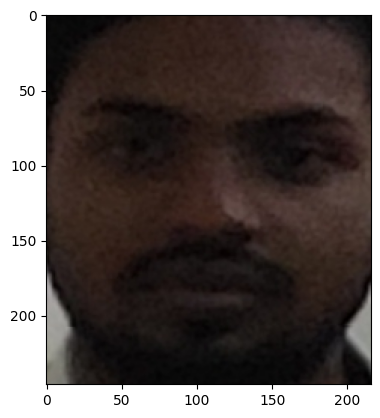

Recognised Student: Shaleh Zaed (22702063)
Euclidean distance: 1.185074526052934
Time taken in embedding and recognition: 31.202200412750244
Distance: 1.1995279932841232 Threshold: 1.04  Minimum: inf
Distance: 1.1487920936506992 Threshold: 1.04  Minimum: inf
Distance: 1.163916114748952 Threshold: 1.04  Minimum: inf
Distance: 1.1710929595775694 Threshold: 1.04  Minimum: inf
Distance: 1.1764187985677967 Threshold: 1.04  Minimum: inf
Distance: 1.3497796433180143 Threshold: 1.04  Minimum: inf
Distance: 1.002414647375138 Threshold: 1.04  Minimum: inf
Distance: 1.1968683252616257 Threshold: 1.04  Minimum: 1.002414647375138
Distance: 1.3115027102364611 Threshold: 1.04  Minimum: 1.002414647375138
Distance: 1.2548437287254826 Threshold: 1.04  Minimum: 1.002414647375138
Distance: 1.4050539560679924 Threshold: 1.04  Minimum: 1.002414647375138
Distance: 1.3074739783759188 Threshold: 1.04  Minimum: 1.002414647375138
Distance: 1.2000655318599542 Threshold: 1.04  Minimum: 1.002414647375138
Distance: 

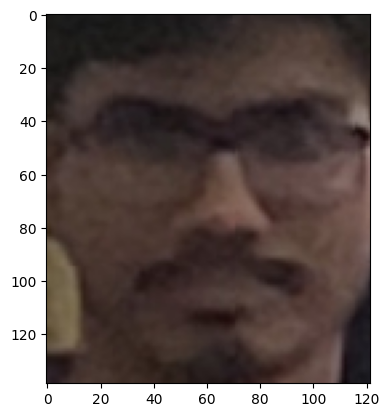

Recognised Student: Dibakor Roy (22702054)
Euclidean distance: 1.2715187605344294
Time taken in embedding and recognition: 29.811391592025757
Distance: 0.5874515551968925 Threshold: 1.04  Minimum: inf
Distance: 1.1940484805936091 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.1316071772628946 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.2744207123125728 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.259854299817688 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.240048938129582 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 0.9440475867999706 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 0.9885982759768117 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.276701071344094 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.3281581381220626 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.334713738133469 Threshold: 1.04  Minimum: 0.5874515551968925
Distance: 1.3396101699076763 Threshold: 1.04  Minimum: 0.587451

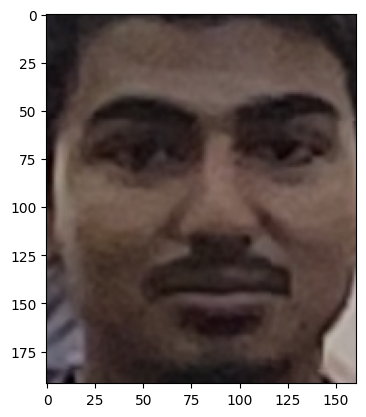

Recognised Student: Sultanul Arefin (22702037)
Euclidean distance: 1.1614204842749891
Time taken in embedding and recognition: 30.86719799041748
Distance: 1.172236127023245 Threshold: 1.04  Minimum: inf
Distance: 1.1434229778997431 Threshold: 1.04  Minimum: inf
Distance: 0.8491947880519526 Threshold: 1.04  Minimum: inf
Distance: 1.307244280693156 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.2687511437950847 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.2389606573131964 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.1486588851246133 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.3180638503081936 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.301506463261261 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.3603559959909182 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.5137526402598651 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.3290569533043497 Threshold: 1.04  Minimum: 0.8491947880519526
Distance: 1.285

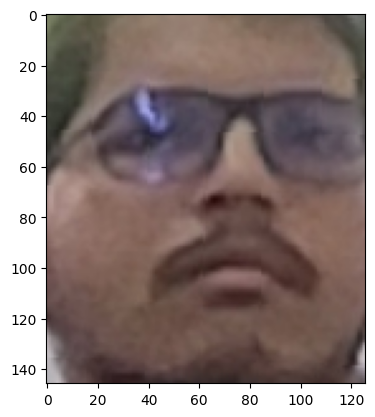

Recognised Student: Kollol Sarkar (22702017)
Euclidean distance: 1.244291246519553
Time taken in embedding and recognition: 30.90165066719055
Distance: 1.1585380528707279 Threshold: 1.04  Minimum: inf
Distance: 1.148016982515083 Threshold: 1.04  Minimum: inf
Distance: 1.242912336959037 Threshold: 1.04  Minimum: inf
Distance: 0.8731483193809094 Threshold: 1.04  Minimum: inf
Distance: 1.183751128133827 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.170379622388031 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.0041645971284094 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.1847887840347324 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.0850480817464303 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.04542825410984 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.2333426368750993 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.2583344774299237 Threshold: 1.04  Minimum: 0.8731483193809094
Distance: 1.247508651554627 Threshol

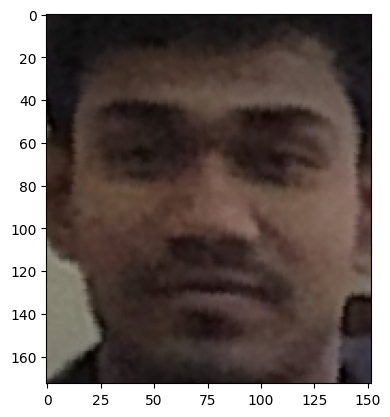

Recognised Student: Abdullah Al Shakib (22702059)
Euclidean distance: 1.1304723507401548
Time taken in embedding and recognition: 31.287325143814087
Distance: 1.318162540259769 Threshold: 1.04  Minimum: inf
Distance: 1.2200066916211671 Threshold: 1.04  Minimum: inf
Distance: 1.3815729084681843 Threshold: 1.04  Minimum: inf
Distance: 1.0151795871490688 Threshold: 1.04  Minimum: inf
Distance: 1.177049516666282 Threshold: 1.04  Minimum: 1.0151795871490688
Distance: 1.3161135725504527 Threshold: 1.04  Minimum: 1.0151795871490688
Distance: 1.082885273902877 Threshold: 1.04  Minimum: 1.0151795871490688
Distance: 1.2153495603281266 Threshold: 1.04  Minimum: 1.0151795871490688
Distance: 1.0509052438294573 Threshold: 1.04  Minimum: 1.0151795871490688
Distance: 0.9578118462374853 Threshold: 1.04  Minimum: 1.0151795871490688
Distance: 1.1957937148960098 Threshold: 1.04  Minimum: 0.9578118462374853
Distance: 1.1621337452725764 Threshold: 1.04  Minimum: 0.9578118462374853
Distance: 1.19073621808311

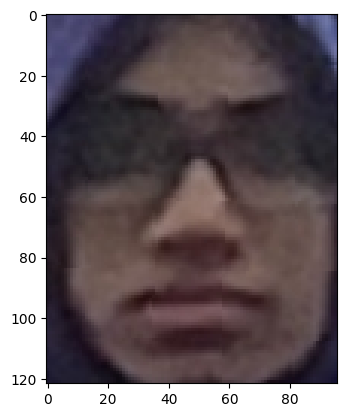

Recognised Student: Tasnim Tabassum Anika (22702001)
Euclidean distance: 1.1396842461826853
Time taken in embedding and recognition: 34.17965602874756
Distance: 1.2095110932880084 Threshold: 1.04  Minimum: inf
Distance: 1.1561324207841392 Threshold: 1.04  Minimum: inf
Distance: 1.0846044514138389 Threshold: 1.04  Minimum: inf
Distance: 1.1360228717032164 Threshold: 1.04  Minimum: inf
Distance: 1.2858113079061748 Threshold: 1.04  Minimum: inf
Distance: 0.7849079929991867 Threshold: 1.04  Minimum: inf
Distance: 1.1028236182285054 Threshold: 1.04  Minimum: 0.7849079929991867
Distance: 1.1134284054850314 Threshold: 1.04  Minimum: 0.7849079929991867
Distance: 1.1440955512856559 Threshold: 1.04  Minimum: 0.7849079929991867
Distance: 1.153311458667018 Threshold: 1.04  Minimum: 0.7849079929991867
Distance: 1.1332167970543217 Threshold: 1.04  Minimum: 0.7849079929991867
Distance: 1.2665111875755737 Threshold: 1.04  Minimum: 0.7849079929991867
Distance: 1.2699054164234072 Threshold: 1.04  Minimu

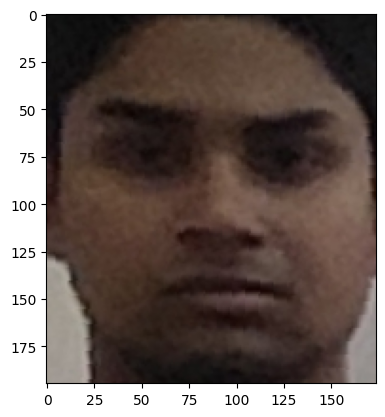

Recognised Student: Isabah Sharar (22702057)
Euclidean distance: 1.1790427667782077
Time taken in embedding and recognition: 29.448258876800537
Distance: 1.145731769215781 Threshold: 1.04  Minimum: inf
Distance: 1.241944805237467 Threshold: 1.04  Minimum: inf
Distance: 1.2158855750669761 Threshold: 1.04  Minimum: inf
Distance: 1.2848262020083367 Threshold: 1.04  Minimum: inf
Distance: 1.2416262856888314 Threshold: 1.04  Minimum: inf
Distance: 1.3343425703907508 Threshold: 1.04  Minimum: inf
Distance: 0.9600147669382127 Threshold: 1.04  Minimum: inf
Distance: 1.241124737287147 Threshold: 1.04  Minimum: 0.9600147669382127
Distance: 1.3399587657877963 Threshold: 1.04  Minimum: 0.9600147669382127
Distance: 1.3523761568137884 Threshold: 1.04  Minimum: 0.9600147669382127
Distance: 1.333299551735574 Threshold: 1.04  Minimum: 0.9600147669382127
Distance: 1.399011495242631 Threshold: 1.04  Minimum: 0.9600147669382127
Distance: 0.8529083059828071 Threshold: 1.04  Minimum: 0.9600147669382127
Dist

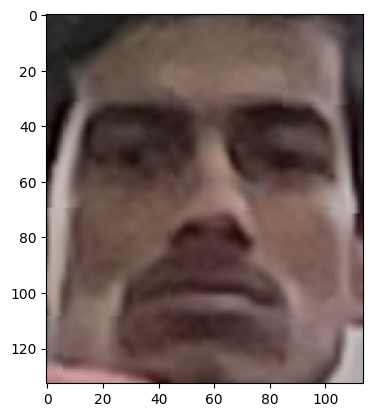

Recognised Student: Mohammudul Islam Raihan (22702005)
Euclidean distance: 1.1584596851929747
Time taken in embedding and recognition: 30.250314712524414
Distance: 1.265771909210069 Threshold: 1.04  Minimum: inf
Distance: 0.8963960547454051 Threshold: 1.04  Minimum: inf
Distance: 0.9776580525438678 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.2258359549623163 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.2509500473254307 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.3629263388555906 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.1035983268686176 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.2053822218799866 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.1715065239671285 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.2883169097144131 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.3032643330140234 Threshold: 1.04  Minimum: 0.8963960547454051
Distance: 1.2984360603288305 Threshold: 1.04  Minimum: 0.896396

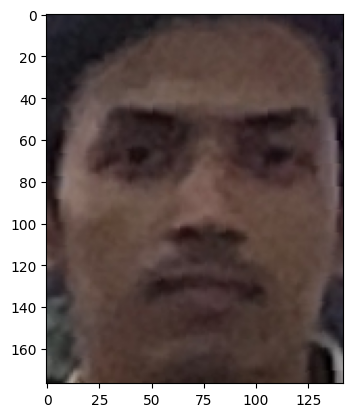

Recognised Student: Rased Khan (22702031)
Euclidean distance: 0.8515284589504292
Time taken in embedding and recognition: 32.714258670806885
Distance: 1.229189300847049 Threshold: 1.04  Minimum: inf
Distance: 1.1566892670697804 Threshold: 1.04  Minimum: inf
Distance: 1.2526925074470383 Threshold: 1.04  Minimum: inf
Distance: 0.9787999878961544 Threshold: 1.04  Minimum: inf
Distance: 0.7389214715388889 Threshold: 1.04  Minimum: 0.9787999878961544
Distance: 1.1294273467858749 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.0263447857946433 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.1747960251219016 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.2386922237338307 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.2277440593684155 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.3392810072405426 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.3010269803320886 Threshold: 1.04  Minimum: 0.7389214715388889
Distance: 1.0854897849956013 Thr

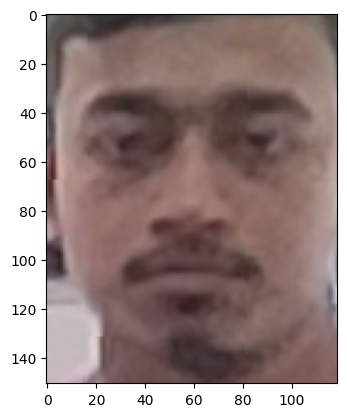

Recognised Student: Atikur Rahman (22702049)
Euclidean distance: 1.2033828866379492
Time taken in embedding and recognition: 33.44785189628601
Distance: 1.281984877599266 Threshold: 1.04  Minimum: inf
Distance: 1.3144875514017913 Threshold: 1.04  Minimum: inf
Distance: 1.2233267166224775 Threshold: 1.04  Minimum: inf
Distance: 1.393064590615773 Threshold: 1.04  Minimum: inf
Distance: 1.3157005047413333 Threshold: 1.04  Minimum: inf
Distance: 1.3159385896251983 Threshold: 1.04  Minimum: inf
Distance: 1.2938928867414843 Threshold: 1.04  Minimum: inf
Distance: 1.1145371291555917 Threshold: 1.04  Minimum: inf
Distance: 1.2301739738691213 Threshold: 1.04  Minimum: inf
Distance: 1.258556630191996 Threshold: 1.04  Minimum: inf
Distance: 0.8509539497439804 Threshold: 1.04  Minimum: inf
Distance: 1.191974315779321 Threshold: 1.04  Minimum: 0.8509539497439804
Distance: 1.2136915692470818 Threshold: 1.04  Minimum: 0.8509539497439804
Distance: 1.2953447358297943 Threshold: 1.04  Minimum: 0.8509539

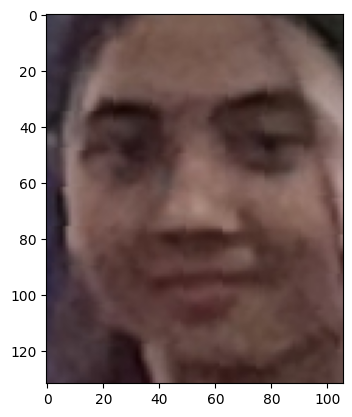

Recognised Student: Tayaba Haque Chaity (22702012)
Euclidean distance: 1.2638262188784397
Time taken in embedding and recognition: 32.62155032157898
Distance: 1.2292646075473372 Threshold: 1.04  Minimum: inf
Distance: 0.7895741536404159 Threshold: 1.04  Minimum: inf
Distance: 1.0755048957244802 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.2326722914717578 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.244857738652545 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.3050528348020205 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.1087255030686682 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.1071969306105531 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.2261585241579311 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.1634106908089785 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.270825126707977 Threshold: 1.04  Minimum: 0.7895741536404159
Distance: 1.2104843229579672 Threshold: 1.04  Minimum: 0.789574153640

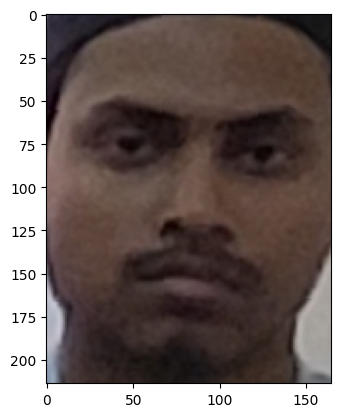

Recognised Student: Ayead Mujib Tamim (22702035)
Euclidean distance: 1.1819321583096598
Time taken in embedding and recognition: 33.47920799255371
Distance: 1.1445230677552871 Threshold: 1.04  Minimum: inf
Distance: 1.1368925184838938 Threshold: 1.04  Minimum: inf
Distance: 1.1360125337554345 Threshold: 1.04  Minimum: inf
Distance: 1.184308641893043 Threshold: 1.04  Minimum: inf
Distance: 1.2768210043830697 Threshold: 1.04  Minimum: inf
Distance: 1.1867043246591342 Threshold: 1.04  Minimum: inf
Distance: 1.1318906006021636 Threshold: 1.04  Minimum: inf
Distance: 1.1866420881631166 Threshold: 1.04  Minimum: inf
Distance: 1.2137754598005293 Threshold: 1.04  Minimum: inf
Distance: 1.2380750967694616 Threshold: 1.04  Minimum: inf
Distance: 1.2162879016452166 Threshold: 1.04  Minimum: inf
Distance: 1.306122722201124 Threshold: 1.04  Minimum: inf
Distance: 1.2375757673585663 Threshold: 1.04  Minimum: inf
Distance: 1.0869601305233687 Threshold: 1.04  Minimum: inf
Distance: 1.0870254855821768 

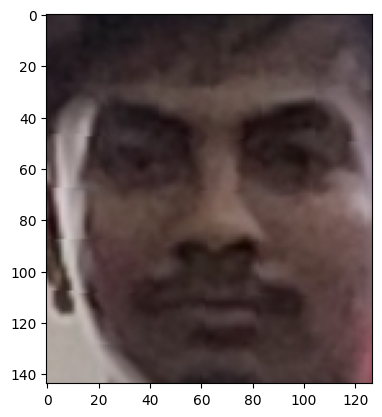

Recognised Student: Akram Hossain Ifty (22702013)
Euclidean distance: 1.2756724426337323
Time taken in embedding and recognition: 30.087125062942505
Distance: 1.3118422471968076 Threshold: 1.04  Minimum: inf
Distance: 1.3043628251369885 Threshold: 1.04  Minimum: inf
Distance: 1.2998648161646753 Threshold: 1.04  Minimum: inf
Distance: 1.3817293909680577 Threshold: 1.04  Minimum: inf
Distance: 1.3983376239110212 Threshold: 1.04  Minimum: inf
Distance: 1.3812138115848291 Threshold: 1.04  Minimum: inf
Distance: 1.3746747152795455 Threshold: 1.04  Minimum: inf
Distance: 1.4156761675392942 Threshold: 1.04  Minimum: inf
Distance: 1.0103639197880099 Threshold: 1.04  Minimum: inf
Distance: 0.9449350928387295 Threshold: 1.04  Minimum: 1.0103639197880099
Distance: 0.9573165610280181 Threshold: 1.04  Minimum: 0.9449350928387295
Distance: 0.812734419640715 Threshold: 1.04  Minimum: 0.9449350928387295
Distance: 1.335606830204869 Threshold: 1.04  Minimum: 0.812734419640715
Distance: 1.343581410266422

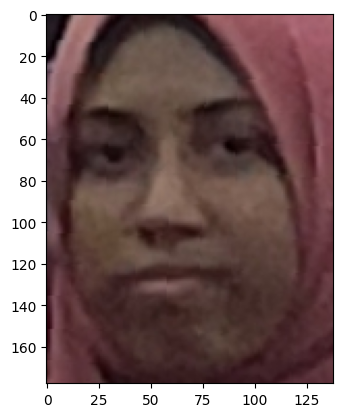

Recognised Student: Zarifa Raiyan (21702068)
Euclidean distance: 1.1995633819005254
Time taken in embedding and recognition: 33.59876227378845
Number of detected faces: 15
Number of recognized students: 14


In [8]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
from PIL import Image
import time
from deepface.modules import verification as vr


path = "./session21-22/classroom/7.jpg"
threshold = vr.find_threshold('Facenet512', 'euclidean_l2')
print(threshold)
faces = RetinaFace.extract_faces(img_path = path, align = True)
present_students = []

for face in faces:
    img = Image.fromarray(face)
    img.save('temp.jpg')
    min = float('inf')
    min_match_student = None
    start = time.time()
    embedding = np.array(DeepFace.represent('./temp.jpg', model_name = 'Facenet512', align=True, detector_backend='retinaface', enforce_detection = False))
    for student in database:
        source = vr.l2_normalize(student['face_embedding'][0]['embedding'])
        target = vr.l2_normalize(embedding[0]['embedding'])
        distance = vr.find_euclidean_distance(source, target)
        if distance <= threshold:
            if distance < min:
                min = distance
                min_match_student = student
    if not min_match_student:
        continue
    end = time.time()
    present_students.append(min_match_student)
    plt.imshow(face)
    plt.show()
    print('Recognised Student: {recognised_student} ({ID})'.format(recognised_student = min_match_student['name'], ID=min_match_student['ID']))
    print('Euclidean distance: {dst}'.format(dst=min))
    print('Time taken in embedding and recognition: {time}'.format(time = end-start))

print('Number of detected faces: {detected_faces}'.format(detected_faces=len(faces)))
print('Number of recognized students: {recognized_num}'.format(recognized_num=len(present_students)))

# start_total = time.time()
# path = "./session21-22/classroom/6.jpg"
# threshold = vr.find_threshold('Facenet', 'euclidean')
# faces = RetinaFace.extract_faces(img_path = path, align = True)
# present_students = []

# # resp = RetinaFace.detect_faces(path)
# # img = cv2.imread(path)
# # RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # for key in resp.keys():
# #     face = resp[key]
# #     xmin = face['facial_area'][0]
# #     ymin = face['facial_area'][1]
# #     xmax = face['facial_area'][2]
# #     ymax = face['facial_area'][3]
# #     cv2.rectangle(RGB_img, (xmin, ymin), (xmax, ymax), color=(255,0,0), thickness=4)
# # plt.imshow(RGB_img)
# # plt.show()

# for face in faces:
#     img = Image.fromarray(face)
#     img.save('temp.jpg')
    
#     start = time.time()
#     embedding = np.array(DeepFace.represent('./temp.jpg', model_name = 'Facenet', align=True, detector_backend='retinaface', enforce_detection = False))
#     for student in database:
#         source = student['face_embedding'][0]['embedding']
#         target = embedding[0]['embedding']
#         distance = vr.find_euclidean_distance(source, target)
#         if distance <= threshold:
#             end = time.time()
#             present_students.append(student)
#             plt.imshow(face)
#             plt.show()
#             print('Recognised Student: {recognised_student} ({ID})'.format(recognised_student = student['name'], ID=student['ID']))
#             print('Euclidean distance: {dst}'.format(dst=distance))
#             print('Time taken in embedding and recognition: {time}'.format(time = end-start))
#             break
    

# end_total = time.time()
# print("Total time: {time}".format(time=end_total-start_total))
# print('Number of detected faces: {detected_faces}'.format(detected_faces=len(faces)))
# print('Number of recognized students: {recognized_num}'.format(recognized_num=len(present_students)))


In [5]:
print(1.1995633819005254<=threshold)

False


In [ ]:
import cv2
import numpy as np
import imutils
from retinaface import RetinaFace
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
from PIL import Image
import time
from deepface.modules import verification as vr

def beginRecognition():
    start_total = time.time()
    threshold = vr.find_threshold('Facenet', 'euclidean')
    faces = RetinaFace.extract_faces(img_path = "./snapshot.png", align = True)
    present_students = []

    for face in faces:
        img = Image.fromarray(face)
        img.save('temp.jpg')

        start = time.time()
        embedding = np.array(DeepFace.represent('./temp.jpg', model_name = 'Facenet', align=True, detector_backend='retinaface', enforce_detection = False))
        for student in database:
            source = student['face_embedding'][0]['embedding']
            target = embedding[0]['embedding']
            distance = vr.find_euclidean_distance(source, target)
            if distance <= threshold:
                end = time.time()
                present_students.append(student)
                plt.imshow(face)
                plt.show()
                print('Recognised Student: {recognised_student}'.format(recognised_student = student['name']))
                print('Euclidean distance: {dst}'.format(dst=distance))
                print('Time taken in embedding and recognition: {time}'.format(time = end-start))
                break


    end_total = time.time()
    print("Total time: {time}".format(time=end_total-start_total))
    print('Number of detected faces: {detected_faces}'.format(detected_faces=len(faces)))
    print('Number of recognized students: {recognized_num}'.format(recognized_num=len(present_students)))


url = "https://192.168.0.100:8080/video"
cap = cv2.VideoCapture(url)
captured = False

cv2.namedWindow("Stream", cv2.WINDOW_NORMAL)
cv2.resizeWindow('Stream', 900, 900) 
while(True):
    camera, frame = cap.read()
    if frame is not None:
        cv2.imshow("Stream", frame)
    q = cv2.waitKey(1)
    if q==ord("q"):
        break
    elif q%256 == 32:
        # SPACE pressed
        img_name = "snapshot.png"
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        captured = True
        break
cv2.destroyAllWindows()

if captured:
    beginRecognition()



In [2]:
import cv2
import numpy as np
import imutils
from retinaface import RetinaFace
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
from PIL import Image
import time
from deepface.modules import verification as vr
import json


def inputStudentInformation():
    name = input("Student Name:")
    ID = input("Student ID:")

    url = "https://192.168.7.133:8080/video"
    cap = cv2.VideoCapture(url)
    captured = False
    cv2.namedWindow("Stream", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Stream', 900, 900) 

    while(True):
        camera, frame = cap.read()
        if frame is not None:
            dispFrame = cv2.resize(frame, (200, 200))
            cv2.imshow("Stream", dispFrame)
        q = cv2.waitKey(1)
        if q==ord("q"):
            break
        elif q%256 == 32:
            # SPACE pressed
            img_name = "./session21-22/{filename}.png".format(filename=ID)
            cv2.imwrite(img_name, frame)
            break
    cv2.destroyAllWindows()
    temp = {
        'name': name,
        'ID': ID,
        'image': "./session21-22/{filename}.png".format(filename=ID)
    }

    f = open('./session21-22/21-22.json')
    training_data = json.load(f)
    training_data.append(temp)
    f.close()

    with open('./session21-22/21-22.json', 'w', encoding='utf-8') as f:
        json.dump(training_data, f, ensure_ascii=False, indent=4)
    f.close()
    print("Data entered successfully!")

try:
    while True:
        inputStudentInformation()
except KeyboardInterrupt:
    pass

Student Name:Sultanul Arefin
Student ID:22702037
Data entered successfully!
Student Name:Ayead Mujib Tamim
Student ID:22702035
Data entered successfully!
Student Name:Kollol Sarkar
Student ID:22702017
Data entered successfully!
Student Name:Abdullah Al Shakib
Student ID:22702059
Data entered successfully!
Student Name:Atikur Rahman
Student ID:22702049
Data entered successfully!
Student Name:Isabah Sharar
Student ID:22702057
Data entered successfully!
Student Name:Dibakor Roy
Student ID:22702054
Data entered successfully!
Student Name:Akram Hossain Ifty
Student ID:22702013
Data entered successfully!
Student Name:Afia Farzana
Student ID:22702018
Data entered successfully!
Student Name:Tasnim Tabassum Anika
Student ID:22702001
Data entered successfully!
Student Name:Tayaba Haque Chaity
Student ID:22702012
Data entered successfully!
Student Name:Zarifa Raiyan
Student ID:21702068
Data entered successfully!
Student Name:Mohammudul Islam Raihan
Student ID:22702005
Data entered successfully!
S